In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats



In [ ]:
#load data
wallmart_data = pd.read_csv("/content/drive/My Drive/csv/Walmart_sales.csv")

print('wallmart_data:')
wallmart_data.head()



wallmart_data:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


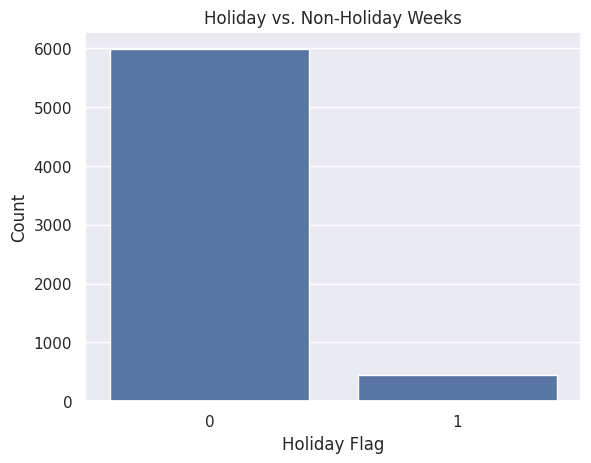

In [ ]:
#Count Plot of Holiday vs. Non-Holiday Weeks:

sns.countplot(x='Holiday_Flag', data=wallmart_data)
plt.xlabel('Holiday Flag')
plt.ylabel('Count')
plt.title('Holiday vs. Non-Holiday Weeks')
plt.show()

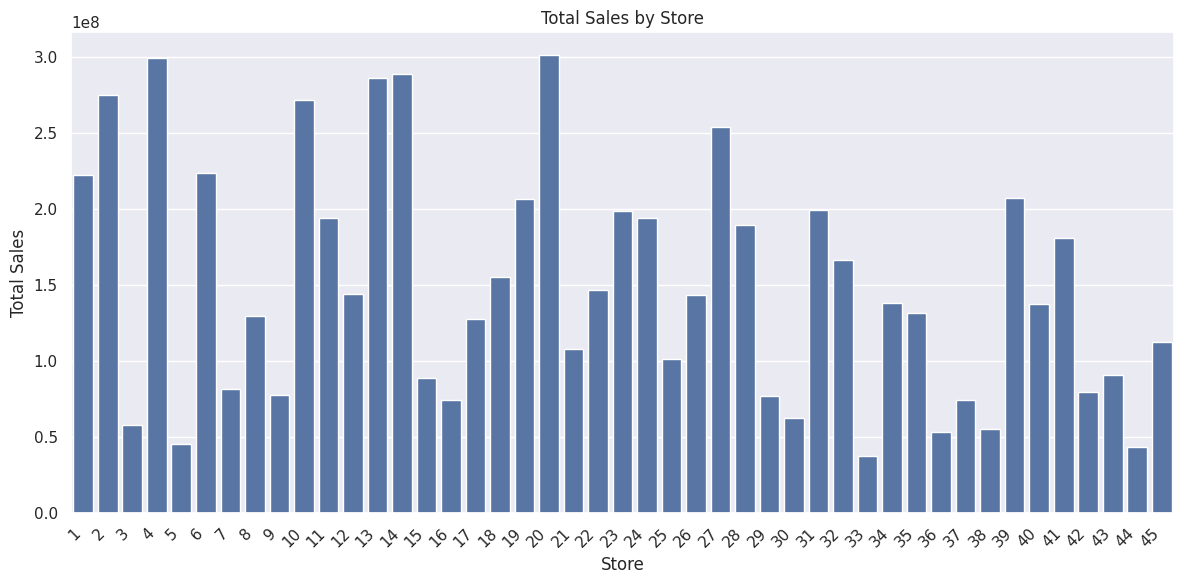

In [ ]:
# Bar Plot of Total Sales by Store:

# Group data by store and sum weekly sales
store_sales = wallmart_data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Create the bar plot using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x='Store', y='Weekly_Sales', data=store_sales)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


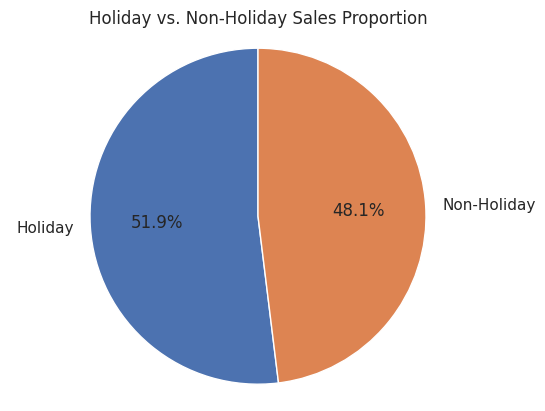

In [ ]:
#Pie Chart of Holiday vs. Non-Holiday Sales Proportion:

holiday_sales = wallmart_data.groupby('Holiday_Flag')['Weekly_Sales'].sum()
holiday_sales_total = holiday_sales[1] + holiday_sales[0]
non_holiday_sales_total = holiday_sales[0]

labels = ['Holiday', 'Non-Holiday']
plt.pie([holiday_sales_total, non_holiday_sales_total], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Holiday vs. Non-Holiday Sales Proportion')
plt.axis('equal')
plt.show()





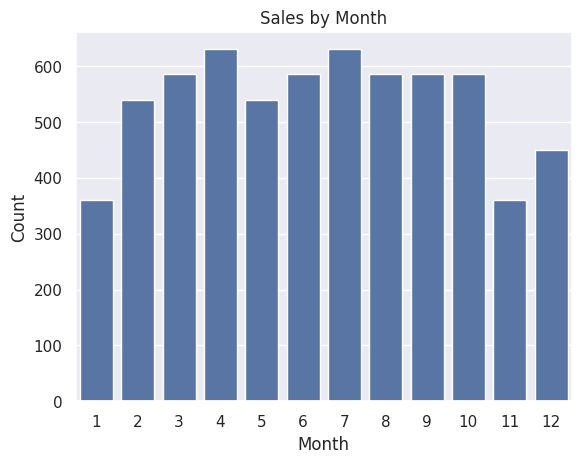

In [ ]:
#Count Plot of Sales by Month:
wallmart_data['Month'] = pd.to_datetime(wallmart_data['Date'], format='%d-%m-%Y').dt.month
sns.countplot(x='Month', data=wallmart_data)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Sales by Month')
plt.show()


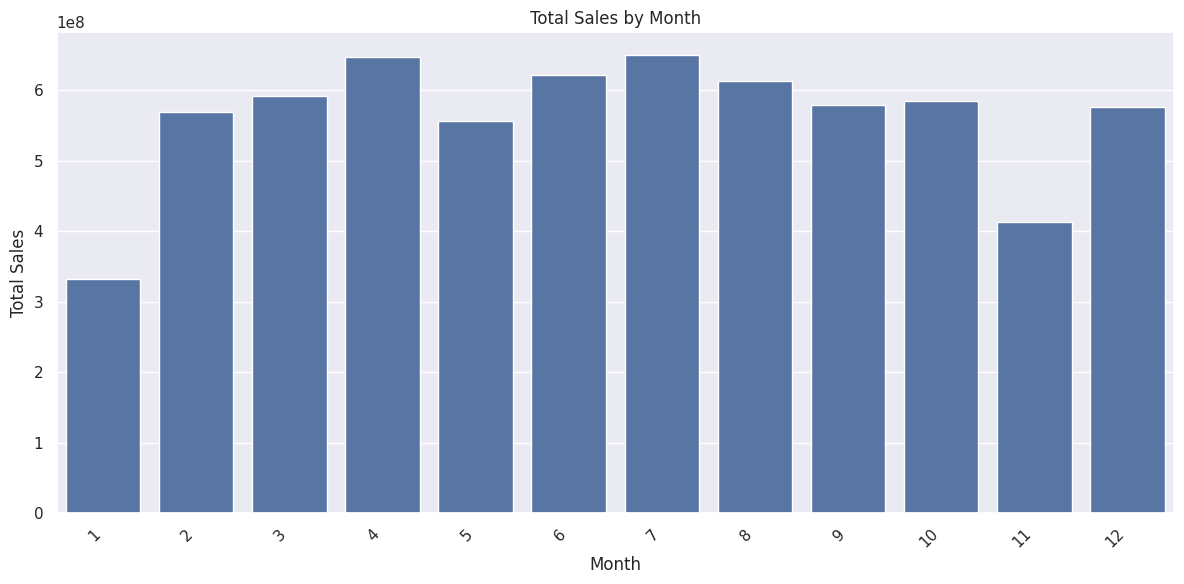

In [ ]:
#Bar Plot of Total Sales by Month:

monthly_sales = wallmart_data.groupby('Month')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Weekly_Sales', data=monthly_sales)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


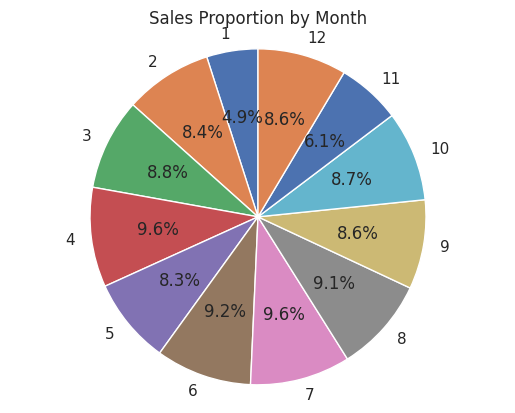

In [ ]:
#Pie Chart of Sales Proportion by Month:

monthly_sales = wallmart_data.groupby('Month')['Weekly_Sales'].sum()
monthly_sales_total = monthly_sales.sum()
monthly_sales_proportions = monthly_sales / monthly_sales_total

labels = monthly_sales.index
plt.pie(monthly_sales_proportions, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sales Proportion by Month')
plt.axis('equal')
plt.show()


In [ ]:
#bonus marks if you explore and do 5 exclusive pots of your own idea

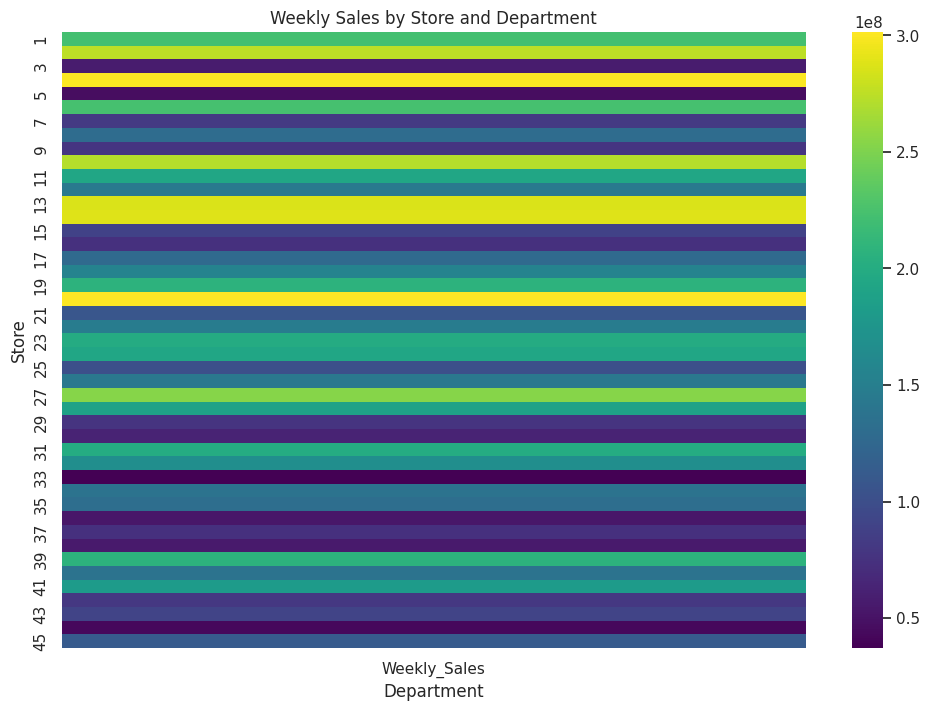

In [ ]:
#bonus try
#1
sales_matrix = wallmart_data.pivot_table(values='Weekly_Sales', index='Store', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_matrix, cmap='viridis', annot=False)  # Set annot=True to display values
plt.title('Weekly Sales by Store and Department')
plt.xlabel('Department')
plt.ylabel('Store')
plt.show()

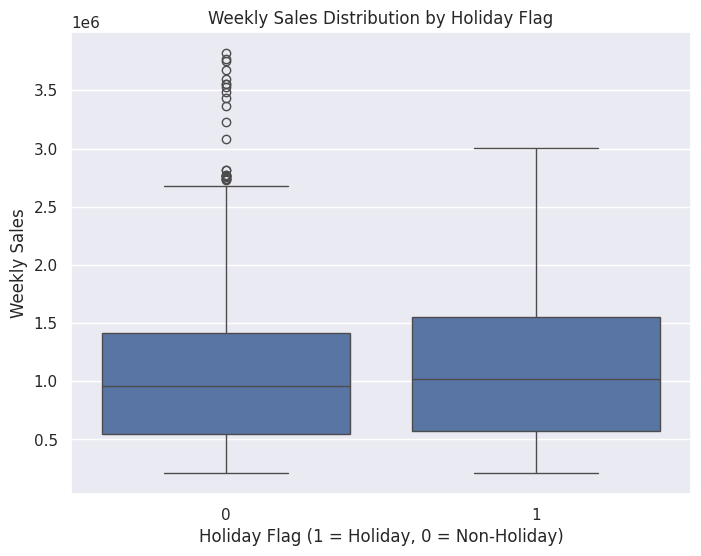

In [ ]:
#2

plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=wallmart_data)
plt.title('Weekly Sales Distribution by Holiday Flag')
plt.xlabel('Holiday Flag (1 = Holiday, 0 = Non-Holiday)')
plt.ylabel('Weekly Sales')
plt.show()

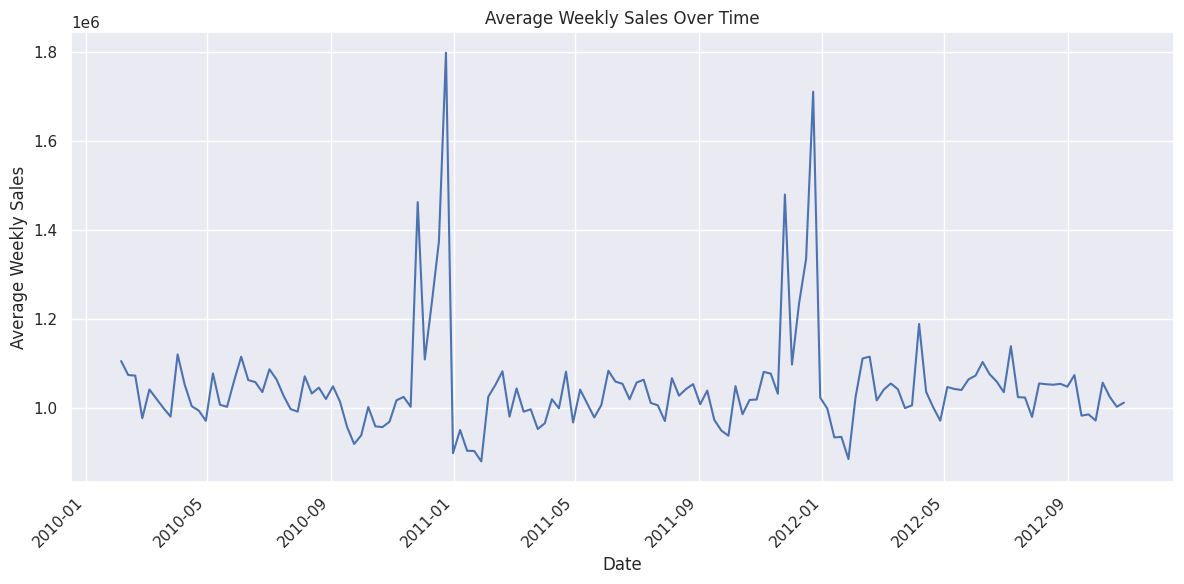

In [ ]:
#3
wallmart_data['Date'] = pd.to_datetime(wallmart_data['Date'], format='%d-%m-%Y')

avg_sales_over_time = wallmart_data.groupby('Date')['Weekly_Sales'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(avg_sales_over_time['Date'], avg_sales_over_time['Weekly_Sales'])
plt.title('Average Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

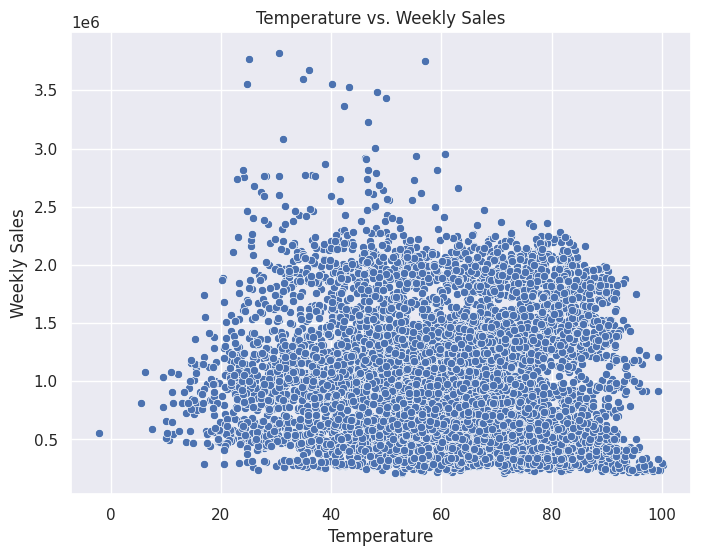

In [ ]:
#4
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=wallmart_data)
plt.title('Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

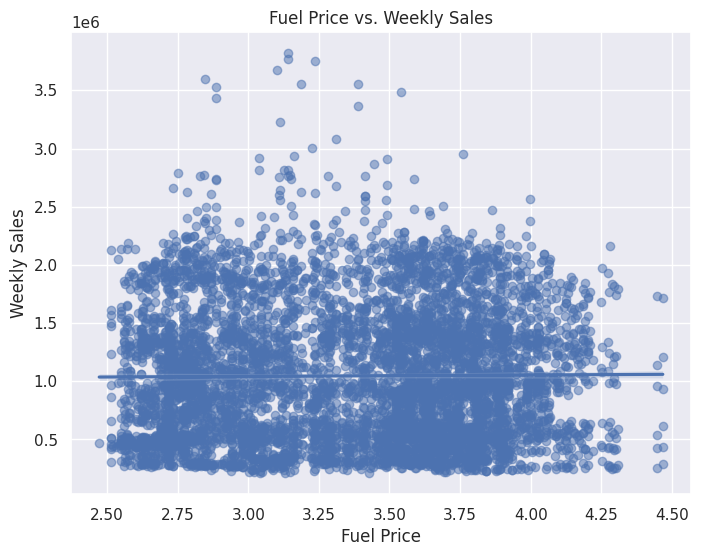

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=wallmart_data, scatter_kws={'alpha':0.5})
plt.title('Fuel Price vs. Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()
